<a href="https://colab.research.google.com/github/kjso3887/Section-2-Project/blob/master/AI_14_%EC%B5%9C%EC%9C%A0%EC%A7%84_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영화 관객수 예측 모델 제작 Project
----------------------

 ## 1. 데이터
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 train데이터를 가지고 test데이터에 대한 관객수를 예측하는 프로젝트입니다.   
__영화 데이터를 활용해 영화의 흥행, 관객수 등을 예측__ 할 수 있지 않을까 생각하던 차에 데이콘에서 관객수 예측 대회를 진행한다는 것을 알게되었습니다.    
데이콘에서 제공하는 데이터셋이 한국 영화를 주제로 한 데이터여서 흥미로웠고, 데이터 양은 많다고 할 수 없지만 k-fold방식을 활용하면 데이터 부족을 어느정도 해결할 수 있을것 같다고 생각했습니다.    
__데이콘 대회 참여__ 와 __프로젝트 진행__ 을 병행해보면 좋을것 같다는 생각이 들어 해당 데이터셋으로 프로젝트를 진행하게 되었습니다.
* 데이터셋 출처(https://dacon.io/competitions/open/235536/data)    
> * 데이터 설명
>1.__title__ - 영화의 제목	
>2.__distributor__ - 배급사	
>3.__genre__ - 장르	
>4.__release_time__ - 개봉일   
>5.__time__ - 상영시간(분)  
>6.__screening_rat__	- 상영등급  
>7.__director__ - 	감독이름  
>8.__dir_prev_bfnum__ - 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)    
>9.__dir_prev_num__ - 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)	  
>10.__num_staff__	- 스텝수    
>11.__num_actor__	- 주연 배우수  
>12.__box_off_num__ - 관객수	

 
 

저의 목표는 관객수를 예측하는 것이기 때문에 __'box_off_num'__ 을 타겟값으로 설정하겠습니다.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("movies_train.csv")
test = pd.read_csv("movies_test.csv")
submission = pd.read_csv("submission.csv")

In [ ]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


In [ ]:
test.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3


데이터를 살펴본 결과 문자열과 수치형 데이터들이 존재합니다. 머신러닝을 적용하기 위해서 Feature Engineering과 EDA를 통해 사용할 특성을 정리하고, 문자열 데이터는 수치형으로 바꾸어주는 과정이 필요할 것으로 보입니다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


7번 컬럼에 결측치가 존재한다는 것을 발견했습니다.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


테스트 데이터셋에도 마찬가지로 7번 컬럼에 결측치가 있습니다.

In [ ]:
train.isna().sum().sort_values()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dir_prev_bfnum    330
dtype: int64

In [ ]:
train['dir_prev_bfnum']

0             NaN
1      1161602.50
2       220775.25
3        23894.00
4            1.00
          ...    
595       3833.00
596     496061.00
597           NaN
598           NaN
599           NaN
Name: dir_prev_bfnum, Length: 600, dtype: float64

증복 데이터 확인

In [ ]:
train['title'].duplicated().sum()

0

데이터 카디널리티 확인

In [ ]:
train.describe(exclude='number')

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,점쟁이들,CJ 엔터테인먼트,드라마,2015-08-13,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


__'genre(장르)'__와 '__screening_rat(상영등급)__'은 명목형 변수이지만, 카디널리티가 적기(범주가 적기) 때문에 인코딩하여 수치형 변수로 만들어 머신러닝에 활용하면 좋을듯 보입니다.

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

* 결측치 제거   
8번 컬럼은 해당 감독이 이전에 제작했던 영화의 개수를 알려주는 것이고, 7번 컬럼은 이러한 영화들의 평균 관람객수를 알려주는 데이터입니다.
따라서, 8번 컬럼의 데이터가 0이라면 이전에 제작했던 영화가 없다는 의미이며, 당연히 7번 컬럼의 값도 0이 나와야 합니다.

In [ ]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [ ]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

dir_prev_bfnum이 결측값인 데이터들의 dir_prev_num의 값들을 모두 합한 결과 0이 나왔습니다.

따라서 dir_prev_bfnum의 결측치들은 모두 0이라고 판단할 수 있습니다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
train.isna().sum() #결측치가 모두 제거됐음을 확인.

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868


결측치가 모두 0으로 채워졌음을 확인할 수 있습니다.

## Feature Engineering

In [ ]:
train.describe(exclude='number')

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,점쟁이들,CJ 엔터테인먼트,드라마,2015-08-13,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.266065,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.266065,1.000000,0.396616,0.369657,0.042491,0.293791
dir_prev_num,0.306727,0.396616,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.369657,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.042491,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.293791,0.259674,0.544265,0.111179,1.000000


Title, distributor, release_time, director은 카디널리티가 너무 많기때문에 학습 변수에서 제외하도록 하겠습니다.

In [ ]:
features = 'time', 'dir_prev_bfnum'

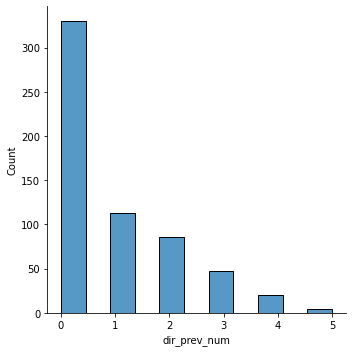

In [ ]:
import seaborn as sns
sns.displot(train['dir_prev_num'])

600개의 영화중 절반정도가 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수가 0개 라는 것을 알 수 있습니다.

In [ ]:
train_num = train[['box_off_num','dir_prev_num']].groupby('dir_prev_num').mean().sort_values('box_off_num').reset_index()
train_num

,dir_prev_num,box_off_num
0,5,3.340028e+05
1,0,3.492043e+05
2,1,6.561018e+05
3,3,1.388813e+06
4,2,1.414767e+06
5,4,2.362598e+06


__해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수가 많을수록 평균적으로 관객수도 많다는 것을 알수 있습니다.__      
이러한 점을 학습에 활용하면 보다 정확한 측정이 가능할 것이라고 추측했습니다.    
해당 사실을 이용해서 __dir_exp__ (감독이 1개 이상의 영화를 촬영했는지 여부) 변수를 새로 생성해주도록 하겠습니다.

In [ ]:
train['dir_exp'] = train['dir_prev_num'] >= 1
train['dir_exp'].nunique()

2

In [ ]:
test['dir_exp'] = test['dir_prev_num'] >= 1
test['dir_exp'].nunique()

2

In [ ]:
train['dir_exp'].value_counts()

False    330
True     270
Name: dir_exp, dtype: int64

In [ ]:
test['dir_exp'].value_counts()

False    136
True     107
Name: dir_exp, dtype: int64

In [ ]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_exp
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,False
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,True
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,True


이제 학습에 활용할 feature와 target을 지정해주도록 하겠습니다.

In [ ]:
features = ['time', 'dir_prev_num', 'genre', 'screening_rat', 'dir_prev_bfnum', 'num_staff', 'num_actor', 'dir_exp']
target = ['box_off_num']

genre와 screening_rat은 명목형 변수이지만 LabelEncoding을 활용하여 수치형 변수로 변환해주도록 하겠습니다.

In [ ]:
!pip install scikit-learn==0.24.2
!pip install category_encoders

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = preprocessing.LabelEncoder()  #문자열 값을 전부 숫자로 변경해주는것
train["genre"] = le.fit_transform(train["genre"]) #변경해주는것 학습
train["screening_rat"] = le.fit_transform(train["screening_rat"])

In [ ]:
train.genre  #장르 값들이 숫자로 변경

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [ ]:
train.screening_rat

0      3
1      3
2      1
3      2
4      1
      ..
595    3
596    1
597    3
598    1
599    1
Name: screening_rat, Length: 600, dtype: int32

In [ ]:
test["genre"] = le.fit_transform(test["genre"])

In [ ]:
test["screening_rat"] = le.fit_transform(test["screening_rat"])

In [ ]:
test.genre

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int32

In [ ]:
test.screening_rat

0      3
1      0
2      0
3      1
4      1
      ..
238    1
239    0
240    3
241    3
242    3
Name: screening_rat, Length: 243, dtype: int32

## Modeling

학습에서는 레퍼런스 자료들을 참고한 결과, LightGBM과 XGboost가 성능이 좋았다는 평이 많아서
해당 모델들을 사용하도록 하겠습니다.

### LightGBM

부스팅 모델     
기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나가게 함

### XGboost

LightGBM과 마찬가지로 부스팅 모델. gradien boostin 알고리즘의 단점을 보안하기 위해 나왔다.   
__XGboost의 특징__
- gbm보다 빠르다
- 자동 가지치기를 통해 과적합이 잘 일어나지 않는다
- 다른 알고리즘과 연계 활용성이 좋다
- 다양한 커스텀 최적화 옵션을 제공한다. 유연성이 좋다


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### K-fold 교차검증

과대적합을 방지하고 모델 간 일반적인 성능을 비교하기 위해 사용

In [ ]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [ ]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state = 42) 

In [ ]:
# 600개에서 4:1의 비율로 train / test로 나누어짐
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


eval_set 평가기준/ early_stopping_rounds 어느 정도 시점이 되면 학습을 중단시켜주는것, 100번의 과정동안 더이상 유의미한 모델의 성능 증가(오차율)가 되지 않는다면 중지/ verbose 100번째 모델마다 출력값 산출

### LigthGBM 모델 학습

In [ ]:
X_train.head(3)

,time,dir_prev_num,genre,screening_rat,dir_prev_bfnum,num_staff,num_actor,dir_exp
0,96,0,10,3,0.00,91,2,False
1,130,2,2,3,1161602.50,387,3,True
2,123,4,10,1,220775.25,343,4,True


k-fold 교차검증을 통해 5개로 분할된 학습 결과를 models에 저장합니다

In [ ]:
model = lgb.LGBMRegressor(random_state = 42, n_estimators=1000)
models = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

[100]	valid_0's l2: 1.94898e+12
[100]	valid_0's l2: 1.12928e+12
[100]	valid_0's l2: 2.34143e+12
[100]	valid_0's l2: 2.70532e+12
[200]	valid_0's l2: 2.68141e+12
[100]	valid_0's l2: 3.22814e+12


In [ ]:
models

[LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42)]

k-fold 교차검증을 통해 5개로 분할된 pred를 preds에 저장합니다

In [ ]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
kfoldLightGBM = submission.copy()

In [ ]:
preds

[array([ 2.56629410e+06,  7.55919556e+05,  8.16788948e+05,  1.66914538e+06,
         1.35982086e+06,  8.16046652e+04,  8.40486057e+04,  7.09833325e+04,
         3.20264464e+04,  1.09156813e+06,  1.05110905e+06,  1.42125310e+06,
         9.90764526e+05, -1.79922771e+04,  6.80917600e+05,  3.62767531e+06,
        -7.70203286e+04,  2.99729969e+06,  3.68965036e+05,  4.01611978e+05,
        -1.22705611e+05,  1.37366138e+05,  6.07341936e+05,  2.14688645e+05,
         3.97673889e+04,  1.70308492e+06,  2.55187375e+04,  1.30681824e+06,
         9.56731184e+04,  3.19099344e+05,  2.10685945e+06,  3.97451734e+04,
         3.52346117e+05,  1.67535697e+06,  3.53908573e+04,  3.97673889e+04,
         8.70300435e+04,  2.43802410e+04,  5.47312057e+04,  2.59445108e+04,
         3.21772437e+05,  5.79709536e+04,  5.92683469e+04,  1.02212176e+06,
         6.33179512e+05,  1.11832815e+06, -6.66165777e+04,  1.17469551e+05,
         1.36203733e+06,  2.13928710e+04,  1.30720933e+04,  8.88599091e+05,
         1.4

k-fold로 나누어진 5개 모델의 예측값(pred)의 평균을 결과로 저장합니다. 

In [ ]:
kfoldLightGBM["box_off_num"] = np.mean(preds, axis = 0) 

In [ ]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,2.566294e+06
1,아빠가 여자를 좋아해,7.559196e+05
2,하모니,8.167889e+05
3,의형제,1.669145e+06
4,평행 이론,1.359821e+06


데이콘 제출 양식에 맡게 csv 파일을 생성한 뒤 제출하여 이후 XGboost와 데이콘 Score를 비교해보겠습니다.

In [ ]:
kfoldLightGBM.to_csv("feLightGBM.csv", index=False)

### XGboost 모델 학습

In [ ]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [ ]:
model2 = xgb.XGBRegressor(random_state=42)
models2 = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models2.append(model2.fit(x_t, y_t, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose = 100))

[0]	validation_0-rmse:1286085.19932
[99]	validation_0-rmse:1621718.18867
[0]	validation_0-rmse:1313946.05982
[99]	validation_0-rmse:1658365.81294
[0]	validation_0-rmse:1905834.75304
[99]	validation_0-rmse:2000179.45284
[0]	validation_0-rmse:2012544.89193
[99]	validation_0-rmse:1943760.54917
[0]	validation_0-rmse:2251347.95062
[99]	validation_0-rmse:1888315.79774


In [ ]:
models2

[XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              i

In [ ]:
preds2 = []
for model2 in models2:
    preds2.append(model2.predict(X_test))
len(preds2)

5

In [ ]:
preds2

[array([2129685.8  , 1057690.5  ,  889935.   , 1333197.1  , 1211203.8  ,
          22741.113,  204672.47 ,   22741.113,   22741.113,  442433.9  ,
         759637.3  , 1192130.5  ,  280443.1  ,   22741.113,  417083.   ,
        3771631.   ,   22741.113, 2608836.2  ,   86037.   ,   91942.   ,
          23015.84 ,   22244.098, 1099133.5  ,   -8619.981,   13476.599,
        1167588.9  ,   23015.84 ,  621569.2  ,  192919.88 ,   73431.39 ,
        2286026.2  ,   23015.84 ,   40405.96 , 1349160.8  ,   22741.113,
         108780.84 ,  204672.47 ,   23015.84 ,   22741.113,   12428.899,
          22741.113,   39167.086,  113919.69 ,  121149.78 ,  435454.5  ,
        2549407.2  ,   23015.84 ,   22741.113,  417206.1  ,   23015.84 ,
          23015.84 , 1539095.1  ,  192960.7  , 1088954.9  ,  626557.   ,
         125941.66 ,  -62018.27 ,  422315.75 , 1228827.6  , 5863370.5  ,
         550452.5  , 2043568.8  ,  103764.625,   22741.113,   22741.113,
          22741.113, 1121776.8  ,   22244.098,  362

In [ ]:
kfoldXGboost = submission.copy()

In [ ]:
kfoldXGboost["box_off_num"] = np.mean(preds2, axis = 0) 

In [ ]:
kfoldXGboost.head()

,title,box_off_num
0,용서는 없다,2129685.750
1,아빠가 여자를 좋아해,1057690.500
2,하모니,889935.000
3,의형제,1333197.125
4,평행 이론,1211203.750


In [ ]:
kfoldXGboost.to_csv('kfoldXGboost.csv', index=False)

In [ ]:
!pip install IPython 

In [ ]:
from IPython.display import Image

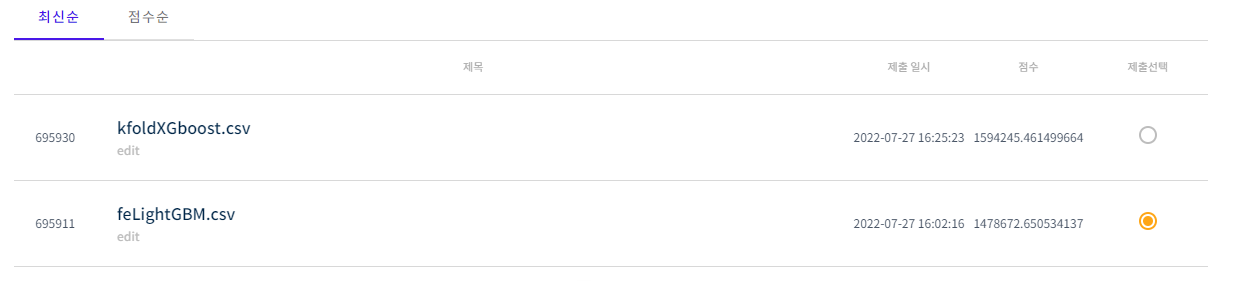

In [ ]:
Image("C:/Users/kjso3/Project/result.PNG")

### 점수를 확인한 결과 LightGBM의 점수가 더 낮기 때문에(평가 지표가 RMSE여서 낮을수록 좋습니다.) LightGBM의 하이퍼 파라미터를 수정하여 다시 제출해보도록 하겠습니다.

## Grid Search

모델 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'learning_rate': [0.2, 0.1, 0.05, 0.01, 0.003], # 값이 적을수록 점점더 미세하게 변화가 이루어짐
    'max_depth': [1,2,3,4,5,6,7,8],# 트리의 최대 깊이 - 과적합 조절
    'n_estimators': [3,5,10,20,30,100,500,1000],# 
    'gamma': [0.5, 1, 2],# leaf node의 추가분할을 결정할 최소손실 감소값값이 - 클수록 과적합 감소
    'min_child_samples': [10, 15, 20, 30] } # leaf node에 포함되는 최소 관측치의 수 - 과적합 조절


gs = GridSearchCV(estimator=model,
            param_grid=params,
            scoring='neg_mean_squared_error', #평가지표인 rmse지표
            cv = k_fold,
            n_jobs = -1 )

In [ ]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=42),
             n_jobs=-1,
             param_grid={'gamma': [0.5, 1, 2],
                         'learning_rate': [0.2, 0.1, 0.05, 0.01, 0.003],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_child_samples': [10, 15, 20, 30],
                         'n_estimators': [3, 5, 10, 20, 30, 100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_samples': 30,
 'n_estimators': 100}

Grid Search 를 활용하여 설정해준 범위 내의 최적의 하이퍼 파라미터 값을 찾았습니다. 이것을 LighGBM 모델에 적용해보고 결과를 보도록 하겠습니다.

In [ ]:
model3 = lgb.LGBMRegressor(
    random_state=42, 
    gamma = 0.5, 
    learning_rate = 0.1, 
    max_depth = 2,
    min_child_samples = 30,
    n_estimators = 100)
models3 = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models3.append(model3.fit(x_t, y_t, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose = 100))

[100]	valid_0's l2: 1.51874e+12
[100]	valid_0's l2: 1.1867e+12
[100]	valid_0's l2: 2.14494e+12
[100]	valid_0's l2: 2.71216e+12
[100]	valid_0's l2: 3.08291e+12


In [ ]:
preds3 = []
for model3 in models3 :
    preds3.append(model3.predict(X_test))

In [ ]:
gsLGBM = submission.copy()

In [ ]:
gsLGBM['box_off_num'] = np.mean(preds3, axis = 0)

In [ ]:
gsLGBM.to_csv("gsLGBM.csv", index= False)

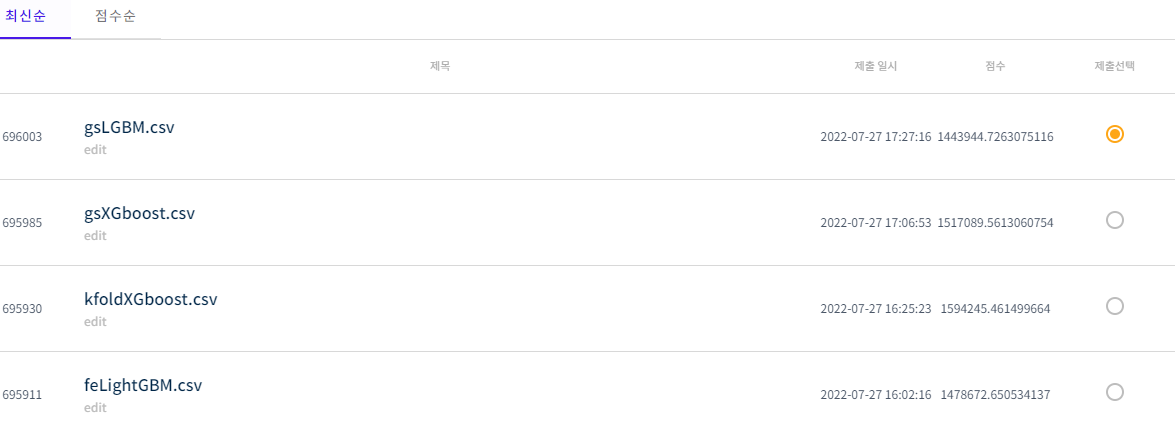

In [ ]:
Image("C:/Users/kjso3/Project/result2.PNG")

__Grid Search를 적용한 LightGBM 모델을 제출한 결과를 보니 점수가 줄어들었습니다. 점수가 적을수록 예측을 잘한 것이기 때문에 적용 전보다 더 좋은 모델이 되었다는 것을 알 수 있습니다.__

### 결과는 제출한 788명중에 617등 ..! ㅠㅠ 많이 아쉽지만 시간도 없었고 교육 데이터 이외의 데이터로 학습을 처음 시도해보았다는 것에 의미를 두고 여기서 마무리 하려고 합니다! 봐주셔서 감사합니다.